In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import json
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import resnet50
from PIL import Image
import json
import os
import torch.optim as optim
import glob
from tqdm.notebook import tqdm

from transformers import ViTModel
from torch.optim.lr_scheduler import StepLR
from transformers import ViTForImageClassification, ViTConfig
from statistics import mean

In [ ]:
import torch
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image classes

In [ ]:
from collections import OrderedDict

IMAGENET2012_CLASSES = OrderedDict(
        {
            "n01440764": "tench, Tinca tinca",
            "n01443537": "goldfish, Carassius auratus",
            "n01484850": "great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias",
            "n01491361": "tiger shark, Galeocerdo cuvieri",
            "n01494475": "hammerhead, hammerhead shark",
            "n01496331": "electric ray, crampfish, numbfish, torpedo",
            "n01498041": "stingray",
            "n01514668": "cock",
            "n01514859": "hen",
            "n01518878": "ostrich, Struthio camelus",
            "n01530575": "brambling, Fringilla montifringilla",
            "n01531178": "goldfinch, Carduelis carduelis",
            "n01532829": "house finch, linnet, Carpodacus mexicanus",
            "n01534433": "junco, snowbird",
            "n01537544": "indigo bunting, indigo finch, indigo bird, Passerina cyanea",
            "n01558993": "robin, American robin, Turdus migratorius",
            "n01560419": "bulbul",
            "n01580077": "jay",
            "n01582220": "magpie",
            "n01592084": "chickadee",
            "n01601694": "water ouzel, dipper",
            "n01608432": "kite",
            "n01614925": "bald eagle, American eagle, Haliaeetus leucocephalus",
            "n01616318": "vulture",
            "n01622779": "great grey owl, great gray owl, Strix nebulosa",
            "n01629819": "European fire salamander, Salamandra salamandra",
            "n01630670": "common newt, Triturus vulgaris",
            "n01631663": "eft",
            "n01632458": "spotted salamander, Ambystoma maculatum",
            "n01632777": "axolotl, mud puppy, Ambystoma mexicanum",
            "n01641577": "bullfrog, Rana catesbeiana",
            "n01644373": "tree frog, tree-frog",
            "n01644900": "tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui",
            "n01664065": "loggerhead, loggerhead turtle, Caretta caretta",
            "n01665541": "leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea",
            "n01667114": "mud turtle",
            "n01667778": "terrapin",
            "n01669191": "box turtle, box tortoise",
            "n01675722": "banded gecko",
            "n01677366": "common iguana, iguana, Iguana iguana",
            "n01682714": "American chameleon, anole, Anolis carolinensis",
            "n01685808": "whiptail, whiptail lizard",
            "n01687978": "agama",
            "n01688243": "frilled lizard, Chlamydosaurus kingi",
            "n01689811": "alligator lizard",
            "n01692333": "Gila monster, Heloderma suspectum",
            "n01693334": "green lizard, Lacerta viridis",
            "n01694178": "African chameleon, Chamaeleo chamaeleon",
            "n01695060": "Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis",
            "n01697457": "African crocodile, Nile crocodile, Crocodylus niloticus",
            "n01698640": "American alligator, Alligator mississipiensis",
            "n01704323": "triceratops",
            "n01728572": "thunder snake, worm snake, Carphophis amoenus",
            "n01728920": "ringneck snake, ring-necked snake, ring snake",
            "n01729322": "hognose snake, puff adder, sand viper",
            "n01729977": "green snake, grass snake",
            "n01734418": "king snake, kingsnake",
            "n01735189": "garter snake, grass snake",
            "n01737021": "water snake",
            "n01739381": "vine snake",
            "n01740131": "night snake, Hypsiglena torquata",
            "n01742172": "boa constrictor, Constrictor constrictor",
            "n01744401": "rock python, rock snake, Python sebae",
            "n01748264": "Indian cobra, Naja naja",
            "n01749939": "green mamba",
            "n01751748": "sea snake",
            "n01753488": "horned viper, cerastes, sand viper, horned asp, Cerastes cornutus",
            "n01755581": "diamondback, diamondback rattlesnake, Crotalus adamanteus",
            "n01756291": "sidewinder, horned rattlesnake, Crotalus cerastes",
            "n01768244": "trilobite",
            "n01770081": "harvestman, daddy longlegs, Phalangium opilio",
            "n01770393": "scorpion",
            "n01773157": "black and gold garden spider, Argiope aurantia",
            "n01773549": "barn spider, Araneus cavaticus",
            "n01773797": "garden spider, Aranea diademata",
            "n01774384": "black widow, Latrodectus mactans",
            "n01774750": "tarantula",
            "n01775062": "wolf spider, hunting spider",
            "n01776313": "tick",
            "n01784675": "centipede",
            "n01795545": "black grouse",
            "n01796340": "ptarmigan",
            "n01797886": "ruffed grouse, partridge, Bonasa umbellus",
            "n01798484": "prairie chicken, prairie grouse, prairie fowl",
            "n01806143": "peacock",
            "n01806567": "quail",
            "n01807496": "partridge",
            "n01817953": "African grey, African gray, Psittacus erithacus",
            "n01818515": "macaw",
            "n01819313": "sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita",
            "n01820546": "lorikeet",
            "n01824575": "coucal",
            "n01828970": "bee eater",
            "n01829413": "hornbill",
            "n01833805": "hummingbird",
            "n01843065": "jacamar",
            "n01843383": "toucan",
            "n01847000": "drake",
            "n01855032": "red-breasted merganser, Mergus serrator",
            "n01855672": "goose",
            "n01860187": "black swan, Cygnus atratus",
            "n01871265": "tusker",
            "n01872401": "echidna, spiny anteater, anteater",
            "n01873310": "platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus",
            "n01877812": "wallaby, brush kangaroo",
            "n01882714": "koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus",
            "n01883070": "wombat",
            "n01910747": "jellyfish",
            "n01914609": "sea anemone, anemone",
            "n01917289": "brain coral",
            "n01924916": "flatworm, platyhelminth",
            "n01930112": "nematode, nematode worm, roundworm",
            "n01943899": "conch",
            "n01944390": "snail",
            "n01945685": "slug",
            "n01950731": "sea slug, nudibranch",
            "n01955084": "chiton, coat-of-mail shell, sea cradle, polyplacophore",
            "n01968897": "chambered nautilus, pearly nautilus, nautilus",
            "n01978287": "Dungeness crab, Cancer magister",
            "n01978455": "rock crab, Cancer irroratus",
            "n01980166": "fiddler crab",
            "n01981276": "king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica",
            "n01983481": "American lobster, Northern lobster, Maine lobster, Homarus americanus",
            "n01984695": "spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish",
            "n01985128": "crayfish, crawfish, crawdad, crawdaddy",
            "n01986214": "hermit crab",
            "n01990800": "isopod",
            "n02002556": "white stork, Ciconia ciconia",
            "n02002724": "black stork, Ciconia nigra",
            "n02006656": "spoonbill",
            "n02007558": "flamingo",
            "n02009229": "little blue heron, Egretta caerulea",
            "n02009912": "American egret, great white heron, Egretta albus",
            "n02011460": "bittern",
            "n02012849": "crane",
            "n02013706": "limpkin, Aramus pictus",
            "n02017213": "European gallinule, Porphyrio porphyrio",
            "n02018207": "American coot, marsh hen, mud hen, water hen, Fulica americana",
            "n02018795": "bustard",
            "n02025239": "ruddy turnstone, Arenaria interpres",
            "n02027492": "red-backed sandpiper, dunlin, Erolia alpina",
            "n02028035": "redshank, Tringa totanus",
            "n02033041": "dowitcher",
            "n02037110": "oystercatcher, oyster catcher",
            "n02051845": "pelican",
            "n02056570": "king penguin, Aptenodytes patagonica",
            "n02058221": "albatross, mollymawk",
            "n02066245": "grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus",
            "n02071294": "killer whale, killer, orca, grampus, sea wolf, Orcinus orca",
            "n02074367": "dugong, Dugong dugon",
            "n02077923": "sea lion",
            "n02085620": "Chihuahua",
            "n02085782": "Japanese spaniel",
            "n02085936": "Maltese dog, Maltese terrier, Maltese",
            "n02086079": "Pekinese, Pekingese, Peke",
            "n02086240": "Shih-Tzu",
            "n02086646": "Blenheim spaniel",
            "n02086910": "papillon",
            "n02087046": "toy terrier",
            "n02087394": "Rhodesian ridgeback",
            "n02088094": "Afghan hound, Afghan",
            "n02088238": "basset, basset hound",
            "n02088364": "beagle",
            "n02088466": "bloodhound, sleuthhound",
            "n02088632": "bluetick",
            "n02089078": "black-and-tan coonhound",
            "n02089867": "Walker hound, Walker foxhound",
            "n02089973": "English foxhound",
            "n02090379": "redbone",
            "n02090622": "borzoi, Russian wolfhound",
            "n02090721": "Irish wolfhound",
            "n02091032": "Italian greyhound",
            "n02091134": "whippet",
            "n02091244": "Ibizan hound, Ibizan Podenco",
            "n02091467": "Norwegian elkhound, elkhound",
            "n02091635": "otterhound, otter hound",
            "n02091831": "Saluki, gazelle hound",
            "n02092002": "Scottish deerhound, deerhound",
            "n02092339": "Weimaraner",
            "n02093256": "Staffordshire bullterrier, Staffordshire bull terrier",
            "n02093428": "American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier",
            "n02093647": "Bedlington terrier",
            "n02093754": "Border terrier",
            "n02093859": "Kerry blue terrier",
            "n02093991": "Irish terrier",
            "n02094114": "Norfolk terrier",
            "n02094258": "Norwich terrier",
            "n02094433": "Yorkshire terrier",
            "n02095314": "wire-haired fox terrier",
            "n02095570": "Lakeland terrier",
            "n02095889": "Sealyham terrier, Sealyham",
            "n02096051": "Airedale, Airedale terrier",
            "n02096177": "cairn, cairn terrier",
            "n02096294": "Australian terrier",
            "n02096437": "Dandie Dinmont, Dandie Dinmont terrier",
            "n02096585": "Boston bull, Boston terrier",
            "n02097047": "miniature schnauzer",
            "n02097130": "giant schnauzer",
            "n02097209": "standard schnauzer",
            "n02097298": "Scotch terrier, Scottish terrier, Scottie",
            "n02097474": "Tibetan terrier, chrysanthemum dog",
            "n02097658": "silky terrier, Sydney silky",
            "n02098105": "soft-coated wheaten terrier",
            "n02098286": "West Highland white terrier",
            "n02098413": "Lhasa, Lhasa apso",
            "n02099267": "flat-coated retriever",
            "n02099429": "curly-coated retriever",
            "n02099601": "golden retriever",
            "n02099712": "Labrador retriever",
            "n02099849": "Chesapeake Bay retriever",
            "n02100236": "German short-haired pointer",
            "n02100583": "vizsla, Hungarian pointer",
            "n02100735": "English setter",
            "n02100877": "Irish setter, red setter",
            "n02101006": "Gordon setter",
            "n02101388": "Brittany spaniel",
            "n02101556": "clumber, clumber spaniel",
            "n02102040": "English springer, English springer spaniel",
            "n02102177": "Welsh springer spaniel",
            "n02102318": "cocker spaniel, English cocker spaniel, cocker",
            "n02102480": "Sussex spaniel",
            "n02102973": "Irish water spaniel",
            "n02104029": "kuvasz",
            "n02104365": "schipperke",
            "n02105056": "groenendael",
            "n02105162": "malinois",
            "n02105251": "briard",
            "n02105412": "kelpie",
            "n02105505": "komondor",
            "n02105641": "Old English sheepdog, bobtail",
            "n02105855": "Shetland sheepdog, Shetland sheep dog, Shetland",
            "n02106030": "collie",
            "n02106166": "Border collie",
            "n02106382": "Bouvier des Flandres, Bouviers des Flandres",
            "n02106550": "Rottweiler",
            "n02106662": "German shepherd, German shepherd dog, German police dog, alsatian",
            "n02107142": "Doberman, Doberman pinscher",
            "n02107312": "miniature pinscher",
            "n02107574": "Greater Swiss Mountain dog",
            "n02107683": "Bernese mountain dog",
            "n02107908": "Appenzeller",
            "n02108000": "EntleBucher",
            "n02108089": "boxer",
            "n02108422": "bull mastiff",
            "n02108551": "Tibetan mastiff",
            "n02108915": "French bulldog",
            "n02109047": "Great Dane",
            "n02109525": "Saint Bernard, St Bernard",
            "n02109961": "Eskimo dog, husky",
            "n02110063": "malamute, malemute, Alaskan malamute",
            "n02110185": "Siberian husky",
            "n02110341": "dalmatian, coach dog, carriage dog",
            "n02110627": "affenpinscher, monkey pinscher, monkey dog",
            "n02110806": "basenji",
            "n02110958": "pug, pug-dog",
            "n02111129": "Leonberg",
            "n02111277": "Newfoundland, Newfoundland dog",
            "n02111500": "Great Pyrenees",
            "n02111889": "Samoyed, Samoyede",
            "n02112018": "Pomeranian",
            "n02112137": "chow, chow chow",
            "n02112350": "keeshond",
            "n02112706": "Brabancon griffon",
            "n02113023": "Pembroke, Pembroke Welsh corgi",
            "n02113186": "Cardigan, Cardigan Welsh corgi",
            "n02113624": "toy poodle",
            "n02113712": "miniature poodle",
            "n02113799": "standard poodle",
            "n02113978": "Mexican hairless",
            "n02114367": "timber wolf, grey wolf, gray wolf, Canis lupus",
            "n02114548": "white wolf, Arctic wolf, Canis lupus tundrarum",
            "n02114712": "red wolf, maned wolf, Canis rufus, Canis niger",
            "n02114855": "coyote, prairie wolf, brush wolf, Canis latrans",
            "n02115641": "dingo, warrigal, warragal, Canis dingo",
            "n02115913": "dhole, Cuon alpinus",
            "n02116738": "African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus",
            "n02117135": "hyena, hyaena",
            "n02119022": "red fox, Vulpes vulpes",
            "n02119789": "kit fox, Vulpes macrotis",
            "n02120079": "Arctic fox, white fox, Alopex lagopus",
            "n02120505": "grey fox, gray fox, Urocyon cinereoargenteus",
            "n02123045": "tabby, tabby cat",
            "n02123159": "tiger cat",
            "n02123394": "Persian cat",
            "n02123597": "Siamese cat, Siamese",
            "n02124075": "Egyptian cat",
            "n02125311": "cougar, puma, catamount, mountain lion, painter, panther, Felis concolor",
            "n02127052": "lynx, catamount",
            "n02128385": "leopard, Panthera pardus",
            "n02128757": "snow leopard, ounce, Panthera uncia",
            "n02128925": "jaguar, panther, Panthera onca, Felis onca",
            "n02129165": "lion, king of beasts, Panthera leo",
            "n02129604": "tiger, Panthera tigris",
            "n02130308": "cheetah, chetah, Acinonyx jubatus",
            "n02132136": "brown bear, bruin, Ursus arctos",
            "n02133161": "American black bear, black bear, Ursus americanus, Euarctos americanus",
            "n02134084": "ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus",
            "n02134418": "sloth bear, Melursus ursinus, Ursus ursinus",
            "n02137549": "mongoose",
            "n02138441": "meerkat, mierkat",
            "n02165105": "tiger beetle",
            "n02165456": "ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle",
            "n02167151": "ground beetle, carabid beetle",
            "n02168699": "long-horned beetle, longicorn, longicorn beetle",
            "n02169497": "leaf beetle, chrysomelid",
            "n02172182": "dung beetle",
            "n02174001": "rhinoceros beetle",
            "n02177972": "weevil",
            "n02190166": "fly",
            "n02206856": "bee",
            "n02219486": "ant, emmet, pismire",
            "n02226429": "grasshopper, hopper",
            "n02229544": "cricket",
            "n02231487": "walking stick, walkingstick, stick insect",
            "n02233338": "cockroach, roach",
            "n02236044": "mantis, mantid",
            "n02256656": "cicada, cicala",
            "n02259212": "leafhopper",
            "n02264363": "lacewing, lacewing fly",
            "n02268443": "dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk",
            "n02268853": "damselfly",
            "n02276258": "admiral",
            "n02277742": "ringlet, ringlet butterfly",
            "n02279972": "monarch, monarch butterfly, milkweed butterfly, Danaus plexippus",
            "n02280649": "cabbage butterfly",
            "n02281406": "sulphur butterfly, sulfur butterfly",
            "n02281787": "lycaenid, lycaenid butterfly",
            "n02317335": "starfish, sea star",
            "n02319095": "sea urchin",
            "n02321529": "sea cucumber, holothurian",
            "n02325366": "wood rabbit, cottontail, cottontail rabbit",
            "n02326432": "hare",
            "n02328150": "Angora, Angora rabbit",
            "n02342885": "hamster",
            "n02346627": "porcupine, hedgehog",
            "n02356798": "fox squirrel, eastern fox squirrel, Sciurus niger",
            "n02361337": "marmot",
            "n02363005": "beaver",
            "n02364673": "guinea pig, Cavia cobaya",
            "n02389026": "sorrel",
            "n02391049": "zebra",
            "n02395406": "hog, pig, grunter, squealer, Sus scrofa",
            "n02396427": "wild boar, boar, Sus scrofa",
            "n02397096": "warthog",
            "n02398521": "hippopotamus, hippo, river horse, Hippopotamus amphibius",
            "n02403003": "ox",
            "n02408429": "water buffalo, water ox, Asiatic buffalo, Bubalus bubalis",
            "n02410509": "bison",
            "n02412080": "ram, tup",
            "n02415577": "bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis",
            "n02417914": "ibex, Capra ibex",
            "n02422106": "hartebeest",
            "n02422699": "impala, Aepyceros melampus",
            "n02423022": "gazelle",
            "n02437312": "Arabian camel, dromedary, Camelus dromedarius",
            "n02437616": "llama",
            "n02441942": "weasel",
            "n02442845": "mink",
            "n02443114": "polecat, fitch, foulmart, foumart, Mustela putorius",
            "n02443484": "black-footed ferret, ferret, Mustela nigripes",
            "n02444819": "otter",
            "n02445715": "skunk, polecat, wood pussy",
            "n02447366": "badger",
            "n02454379": "armadillo",
            "n02457408": "three-toed sloth, ai, Bradypus tridactylus",
            "n02480495": "orangutan, orang, orangutang, Pongo pygmaeus",
            "n02480855": "gorilla, Gorilla gorilla",
            "n02481823": "chimpanzee, chimp, Pan troglodytes",
            "n02483362": "gibbon, Hylobates lar",
            "n02483708": "siamang, Hylobates syndactylus, Symphalangus syndactylus",
            "n02484975": "guenon, guenon monkey",
            "n02486261": "patas, hussar monkey, Erythrocebus patas",
            "n02486410": "baboon",
            "n02487347": "macaque",
            "n02488291": "langur",
            "n02488702": "colobus, colobus monkey",
            "n02489166": "proboscis monkey, Nasalis larvatus",
            "n02490219": "marmoset",
            "n02492035": "capuchin, ringtail, Cebus capucinus",
            "n02492660": "howler monkey, howler",
            "n02493509": "titi, titi monkey",
            "n02493793": "spider monkey, Ateles geoffroyi",
            "n02494079": "squirrel monkey, Saimiri sciureus",
            "n02497673": "Madagascar cat, ring-tailed lemur, Lemur catta",
            "n02500267": "indri, indris, Indri indri, Indri brevicaudatus",
            "n02504013": "Indian elephant, Elephas maximus",
            "n02504458": "African elephant, Loxodonta africana",
            "n02509815": "lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens",
            "n02510455": "giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca",
            "n02514041": "barracouta, snoek",
            "n02526121": "eel",
            "n02536864": "coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch",
            "n02606052": "rock beauty, Holocanthus tricolor",
            "n02607072": "anemone fish",
            "n02640242": "sturgeon",
            "n02641379": "gar, garfish, garpike, billfish, Lepisosteus osseus",
            "n02643566": "lionfish",
            "n02655020": "puffer, pufferfish, blowfish, globefish",
            "n02666196": "abacus",
            "n02667093": "abaya",
            "n02669723": "academic gown, academic robe, judge's robe",
            "n02672831": "accordion, piano accordion, squeeze box",
            "n02676566": "acoustic guitar",
            "n02687172": "aircraft carrier, carrier, flattop, attack aircraft carrier",
            "n02690373": "airliner",
            "n02692877": "airship, dirigible",
            "n02699494": "altar",
            "n02701002": "ambulance",
            "n02704792": "amphibian, amphibious vehicle",
            "n02708093": "analog clock",
            "n02727426": "apiary, bee house",
            "n02730930": "apron",
            "n02747177": "ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin",
            "n02749479": "assault rifle, assault gun",
            "n02769748": "backpack, back pack, knapsack, packsack, rucksack, haversack",
            "n02776631": "bakery, bakeshop, bakehouse",
            "n02777292": "balance beam, beam",
            "n02782093": "balloon",
            "n02783161": "ballpoint, ballpoint pen, ballpen, Biro",
            "n02786058": "Band Aid",
            "n02787622": "banjo",
            "n02788148": "bannister, banister, balustrade, balusters, handrail",
            "n02790996": "barbell",
            "n02791124": "barber chair",
            "n02791270": "barbershop",
            "n02793495": "barn",
            "n02794156": "barometer",
            "n02795169": "barrel, cask",
            "n02797295": "barrow, garden cart, lawn cart, wheelbarrow",
            "n02799071": "baseball",
            "n02802426": "basketball",
            "n02804414": "bassinet",
            "n02804610": "bassoon",
            "n02807133": "bathing cap, swimming cap",
            "n02808304": "bath towel",
            "n02808440": "bathtub, bathing tub, bath, tub",
            "n02814533": "beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon",
            "n02814860": "beacon, lighthouse, beacon light, pharos",
            "n02815834": "beaker",
            "n02817516": "bearskin, busby, shako",
            "n02823428": "beer bottle",
            "n02823750": "beer glass",
            "n02825657": "bell cote, bell cot",
            "n02834397": "bib",
            "n02835271": "bicycle-built-for-two, tandem bicycle, tandem",
            "n02837789": "bikini, two-piece",
            "n02840245": "binder, ring-binder",
            "n02841315": "binoculars, field glasses, opera glasses",
            "n02843684": "birdhouse",
            "n02859443": "boathouse",
            "n02860847": "bobsled, bobsleigh, bob",
            "n02865351": "bolo tie, bolo, bola tie, bola",
            "n02869837": "bonnet, poke bonnet",
            "n02870880": "bookcase",
            "n02871525": "bookshop, bookstore, bookstall",
            "n02877765": "bottlecap",
            "n02879718": "bow",
            "n02883205": "bow tie, bow-tie, bowtie",
            "n02892201": "brass, memorial tablet, plaque",
            "n02892767": "brassiere, bra, bandeau",
            "n02894605": "breakwater, groin, groyne, mole, bulwark, seawall, jetty",
            "n02895154": "breastplate, aegis, egis",
            "n02906734": "broom",
            "n02909870": "bucket, pail",
            "n02910353": "buckle",
            "n02916936": "bulletproof vest",
            "n02917067": "bullet train, bullet",
            "n02927161": "butcher shop, meat market",
            "n02930766": "cab, hack, taxi, taxicab",
            "n02939185": "caldron, cauldron",
            "n02948072": "candle, taper, wax light",
            "n02950826": "cannon",
            "n02951358": "canoe",
            "n02951585": "can opener, tin opener",
            "n02963159": "cardigan",
            "n02965783": "car mirror",
            "n02966193": "carousel, carrousel, merry-go-round, roundabout, whirligig",
            "n02966687": "carpenter's kit, tool kit",
            "n02971356": "carton",
            "n02974003": "car wheel",
            "n02977058": "cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM",
            "n02978881": "cassette",
            "n02979186": "cassette player",
            "n02980441": "castle",
            "n02981792": "catamaran",
            "n02988304": "CD player",
            "n02992211": "cello, violoncello",
            "n02992529": "cellular telephone, cellular phone, cellphone, cell, mobile phone",
            "n02999410": "chain",
            "n03000134": "chainlink fence",
            "n03000247": "chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour",
            "n03000684": "chain saw, chainsaw",
            "n03014705": "chest",
            "n03016953": "chiffonier, commode",
            "n03017168": "chime, bell, gong",
            "n03018349": "china cabinet, china closet",
            "n03026506": "Christmas stocking",
            "n03028079": "church, church building",
            "n03032252": "cinema, movie theater, movie theatre, movie house, picture palace",
            "n03041632": "cleaver, meat cleaver, chopper",
            "n03042490": "cliff dwelling",
            "n03045698": "cloak",
            "n03047690": "clog, geta, patten, sabot",
            "n03062245": "cocktail shaker",
            "n03063599": "coffee mug",
            "n03063689": "coffeepot",
            "n03065424": "coil, spiral, volute, whorl, helix",
            "n03075370": "combination lock",
            "n03085013": "computer keyboard, keypad",
            "n03089624": "confectionery, confectionary, candy store",
            "n03095699": "container ship, containership, container vessel",
            "n03100240": "convertible",
            "n03109150": "corkscrew, bottle screw",
            "n03110669": "cornet, horn, trumpet, trump",
            "n03124043": "cowboy boot",
            "n03124170": "cowboy hat, ten-gallon hat",
            "n03125729": "cradle",
            "n03126707": "crane2",
            "n03127747": "crash helmet",
            "n03127925": "crate",
            "n03131574": "crib, cot",
            "n03133878": "Crock Pot",
            "n03134739": "croquet ball",
            "n03141823": "crutch",
            "n03146219": "cuirass",
            "n03160309": "dam, dike, dyke",
            "n03179701": "desk",
            "n03180011": "desktop computer",
            "n03187595": "dial telephone, dial phone",
            "n03188531": "diaper, nappy, napkin",
            "n03196217": "digital clock",
            "n03197337": "digital watch",
            "n03201208": "dining table, board",
            "n03207743": "dishrag, dishcloth",
            "n03207941": "dishwasher, dish washer, dishwashing machine",
            "n03208938": "disk brake, disc brake",
            "n03216828": "dock, dockage, docking facility",
            "n03218198": "dogsled, dog sled, dog sleigh",
            "n03220513": "dome",
            "n03223299": "doormat, welcome mat",
            "n03240683": "drilling platform, offshore rig",
            "n03249569": "drum, membranophone, tympan",
            "n03250847": "drumstick",
            "n03255030": "dumbbell",
            "n03259280": "Dutch oven",
            "n03271574": "electric fan, blower",
            "n03272010": "electric guitar",
            "n03272562": "electric locomotive",
            "n03290653": "entertainment center",
            "n03291819": "envelope",
            "n03297495": "espresso maker",
            "n03314780": "face powder",
            "n03325584": "feather boa, boa",
            "n03337140": "file, file cabinet, filing cabinet",
            "n03344393": "fireboat",
            "n03345487": "fire engine, fire truck",
            "n03347037": "fire screen, fireguard",
            "n03355925": "flagpole, flagstaff",
            "n03372029": "flute, transverse flute",
            "n03376595": "folding chair",
            "n03379051": "football helmet",
            "n03384352": "forklift",
            "n03388043": "fountain",
            "n03388183": "fountain pen",
            "n03388549": "four-poster",
            "n03393912": "freight car",
            "n03394916": "French horn, horn",
            "n03400231": "frying pan, frypan, skillet",
            "n03404251": "fur coat",
            "n03417042": "garbage truck, dustcart",
            "n03424325": "gasmask, respirator, gas helmet",
            "n03425413": "gas pump, gasoline pump, petrol pump, island dispenser",
            "n03443371": "goblet",
            "n03444034": "go-kart",
            "n03445777": "golf ball",
            "n03445924": "golfcart, golf cart",
            "n03447447": "gondola",
            "n03447721": "gong, tam-tam",
            "n03450230": "gown",
            "n03452741": "grand piano, grand",
            "n03457902": "greenhouse, nursery, glasshouse",
            "n03459775": "grille, radiator grille",
            "n03461385": "grocery store, grocery, food market, market",
            "n03467068": "guillotine",
            "n03476684": "hair slide",
            "n03476991": "hair spray",
            "n03478589": "half track",
            "n03481172": "hammer",
            "n03482405": "hamper",
            "n03483316": "hand blower, blow dryer, blow drier, hair dryer, hair drier",
            "n03485407": "hand-held computer, hand-held microcomputer",
            "n03485794": "handkerchief, hankie, hanky, hankey",
            "n03492542": "hard disc, hard disk, fixed disk",
            "n03494278": "harmonica, mouth organ, harp, mouth harp",
            "n03495258": "harp",
            "n03496892": "harvester, reaper",
            "n03498962": "hatchet",
            "n03527444": "holster",
            "n03529860": "home theater, home theatre",
            "n03530642": "honeycomb",
            "n03532672": "hook, claw",
            "n03534580": "hoopskirt, crinoline",
            "n03535780": "horizontal bar, high bar",
            "n03538406": "horse cart, horse-cart",
            "n03544143": "hourglass",
            "n03584254": "iPod",
            "n03584829": "iron, smoothing iron",
            "n03590841": "jack-o'-lantern",
            "n03594734": "jean, blue jean, denim",
            "n03594945": "jeep, landrover",
            "n03595614": "jersey, T-shirt, tee shirt",
            "n03598930": "jigsaw puzzle",
            "n03599486": "jinrikisha, ricksha, rickshaw",
            "n03602883": "joystick",
            "n03617480": "kimono",
            "n03623198": "knee pad",
            "n03627232": "knot",
            "n03630383": "lab coat, laboratory coat",
            "n03633091": "ladle",
            "n03637318": "lampshade, lamp shade",
            "n03642806": "laptop, laptop computer",
            "n03649909": "lawn mower, mower",
            "n03657121": "lens cap, lens cover",
            "n03658185": "letter opener, paper knife, paperknife",
            "n03661043": "library",
            "n03662601": "lifeboat",
            "n03666591": "lighter, light, igniter, ignitor",
            "n03670208": "limousine, limo",
            "n03673027": "liner, ocean liner",
            "n03676483": "lipstick, lip rouge",
            "n03680355": "Loafer",
            "n03690938": "lotion",
            "n03691459": "loudspeaker, speaker, speaker unit, loudspeaker system, speaker system",
            "n03692522": "loupe, jeweler's loupe",
            "n03697007": "lumbermill, sawmill",
            "n03706229": "magnetic compass",
            "n03709823": "mailbag, postbag",
            "n03710193": "mailbox, letter box",
            "n03710637": "maillot",
            "n03710721": "maillot, tank suit",
            "n03717622": "manhole cover",
            "n03720891": "maraca",
            "n03721384": "marimba, xylophone",
            "n03724870": "mask",
            "n03729826": "matchstick",
            "n03733131": "maypole",
            "n03733281": "maze, labyrinth",
            "n03733805": "measuring cup",
            "n03742115": "medicine chest, medicine cabinet",
            "n03743016": "megalith, megalithic structure",
            "n03759954": "microphone, mike",
            "n03761084": "microwave, microwave oven",
            "n03763968": "military uniform",
            "n03764736": "milk can",
            "n03769881": "minibus",
            "n03770439": "miniskirt, mini",
            "n03770679": "minivan",
            "n03773504": "missile",
            "n03775071": "mitten",
            "n03775546": "mixing bowl",
            "n03776460": "mobile home, manufactured home",
            "n03777568": "Model T",
            "n03777754": "modem",
            "n03781244": "monastery",
            "n03782006": "monitor",
            "n03785016": "moped",
            "n03786901": "mortar",
            "n03787032": "mortarboard",
            "n03788195": "mosque",
            "n03788365": "mosquito net",
            "n03791053": "motor scooter, scooter",
            "n03792782": "mountain bike, all-terrain bike, off-roader",
            "n03792972": "mountain tent",
            "n03793489": "mouse, computer mouse",
            "n03794056": "mousetrap",
            "n03796401": "moving van",
            "n03803284": "muzzle",
            "n03804744": "nail",
            "n03814639": "neck brace",
            "n03814906": "necklace",
            "n03825788": "nipple",
            "n03832673": "notebook, notebook computer",
            "n03837869": "obelisk",
            "n03838899": "oboe, hautboy, hautbois",
            "n03840681": "ocarina, sweet potato",
            "n03841143": "odometer, hodometer, mileometer, milometer",
            "n03843555": "oil filter",
            "n03854065": "organ, pipe organ",
            "n03857828": "oscilloscope, scope, cathode-ray oscilloscope, CRO",
            "n03866082": "overskirt",
            "n03868242": "oxcart",
            "n03868863": "oxygen mask",
            "n03871628": "packet",
            "n03873416": "paddle, boat paddle",
            "n03874293": "paddlewheel, paddle wheel",
            "n03874599": "padlock",
            "n03876231": "paintbrush",
            "n03877472": "pajama, pyjama, pj's, jammies",
            "n03877845": "palace",
            "n03884397": "panpipe, pandean pipe, syrinx",
            "n03887697": "paper towel",
            "n03888257": "parachute, chute",
            "n03888605": "parallel bars, bars",
            "n03891251": "park bench",
            "n03891332": "parking meter",
            "n03895866": "passenger car, coach, carriage",
            "n03899768": "patio, terrace",
            "n03902125": "pay-phone, pay-station",
            "n03903868": "pedestal, plinth, footstall",
            "n03908618": "pencil box, pencil case",
            "n03908714": "pencil sharpener",
            "n03916031": "perfume, essence",
            "n03920288": "Petri dish",
            "n03924679": "photocopier",
            "n03929660": "pick, plectrum, plectron",
            "n03929855": "pickelhaube",
            "n03930313": "picket fence, paling",
            "n03930630": "pickup, pickup truck",
            "n03933933": "pier",
            "n03935335": "piggy bank, penny bank",
            "n03937543": "pill bottle",
            "n03938244": "pillow",
            "n03942813": "ping-pong ball",
            "n03944341": "pinwheel",
            "n03947888": "pirate, pirate ship",
            "n03950228": "pitcher, ewer",
            "n03954731": "plane, carpenter's plane, woodworking plane",
            "n03956157": "planetarium",
            "n03958227": "plastic bag",
            "n03961711": "plate rack",
            "n03967562": "plow, plough",
            "n03970156": "plunger, plumber's helper",
            "n03976467": "Polaroid camera, Polaroid Land camera",
            "n03976657": "pole",
            "n03977966": "police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria",
            "n03980874": "poncho",
            "n03982430": "pool table, billiard table, snooker table",
            "n03983396": "pop bottle, soda bottle",
            "n03991062": "pot, flowerpot",
            "n03992509": "potter's wheel",
            "n03995372": "power drill",
            "n03998194": "prayer rug, prayer mat",
            "n04004767": "printer",
            "n04005630": "prison, prison house",
            "n04008634": "projectile, missile",
            "n04009552": "projector",
            "n04019541": "puck, hockey puck",
            "n04023962": "punching bag, punch bag, punching ball, punchball",
            "n04026417": "purse",
            "n04033901": "quill, quill pen",
            "n04033995": "quilt, comforter, comfort, puff",
            "n04037443": "racer, race car, racing car",
            "n04039381": "racket, racquet",
            "n04040759": "radiator",
            "n04041544": "radio, wireless",
            "n04044716": "radio telescope, radio reflector",
            "n04049303": "rain barrel",
            "n04065272": "recreational vehicle, RV, R.V.",
            "n04067472": "reel",
            "n04069434": "reflex camera",
            "n04070727": "refrigerator, icebox",
            "n04074963": "remote control, remote",
            "n04081281": "restaurant, eating house, eating place, eatery",
            "n04086273": "revolver, six-gun, six-shooter",
            "n04090263": "rifle",
            "n04099969": "rocking chair, rocker",
            "n04111531": "rotisserie",
            "n04116512": "rubber eraser, rubber, pencil eraser",
            "n04118538": "rugby ball",
            "n04118776": "rule, ruler",
            "n04120489": "running shoe",
            "n04125021": "safe",
            "n04127249": "safety pin",
            "n04131690": "saltshaker, salt shaker",
            "n04133789": "sandal",
            "n04136333": "sarong",
            "n04141076": "sax, saxophone",
            "n04141327": "scabbard",
            "n04141975": "scale, weighing machine",
            "n04146614": "school bus",
            "n04147183": "schooner",
            "n04149813": "scoreboard",
            "n04152593": "screen, CRT screen",
            "n04153751": "screw",
            "n04154565": "screwdriver",
            "n04162706": "seat belt, seatbelt",
            "n04179913": "sewing machine",
            "n04192698": "shield, buckler",
            "n04200800": "shoe shop, shoe-shop, shoe store",
            "n04201297": "shoji",
            "n04204238": "shopping basket",
            "n04204347": "shopping cart",
            "n04208210": "shovel",
            "n04209133": "shower cap",
            "n04209239": "shower curtain",
            "n04228054": "ski",
            "n04229816": "ski mask",
            "n04235860": "sleeping bag",
            "n04238763": "slide rule, slipstick",
            "n04239074": "sliding door",
            "n04243546": "slot, one-armed bandit",
            "n04251144": "snorkel",
            "n04252077": "snowmobile",
            "n04252225": "snowplow, snowplough",
            "n04254120": "soap dispenser",
            "n04254680": "soccer ball",
            "n04254777": "sock",
            "n04258138": "solar dish, solar collector, solar furnace",
            "n04259630": "sombrero",
            "n04263257": "soup bowl",
            "n04264628": "space bar",
            "n04265275": "space heater",
            "n04266014": "space shuttle",
            "n04270147": "spatula",
            "n04273569": "speedboat",
            "n04275548": "spider web, spider's web",
            "n04277352": "spindle",
            "n04285008": "sports car, sport car",
            "n04286575": "spotlight, spot",
            "n04296562": "stage",
            "n04310018": "steam locomotive",
            "n04311004": "steel arch bridge",
            "n04311174": "steel drum",
            "n04317175": "stethoscope",
            "n04325704": "stole",
            "n04326547": "stone wall",
            "n04328186": "stopwatch, stop watch",
            "n04330267": "stove",
            "n04332243": "strainer",
            "n04335435": "streetcar, tram, tramcar, trolley, trolley car",
            "n04336792": "stretcher",
            "n04344873": "studio couch, day bed",
            "n04346328": "stupa, tope",
            "n04347754": "submarine, pigboat, sub, U-boat",
            "n04350905": "suit, suit of clothes",
            "n04355338": "sundial",
            "n04355933": "sunglass",
            "n04356056": "sunglasses, dark glasses, shades",
            "n04357314": "sunscreen, sunblock, sun blocker",
            "n04366367": "suspension bridge",
            "n04367480": "swab, swob, mop",
            "n04370456": "sweatshirt",
            "n04371430": "swimming trunks, bathing trunks",
            "n04371774": "swing",
            "n04372370": "switch, electric switch, electrical switch",
            "n04376876": "syringe",
            "n04380533": "table lamp",
            "n04389033": "tank, army tank, armored combat vehicle, armoured combat vehicle",
            "n04392985": "tape player",
            "n04398044": "teapot",
            "n04399382": "teddy, teddy bear",
            "n04404412": "television, television system",
            "n04409515": "tennis ball",
            "n04417672": "thatch, thatched roof",
            "n04418357": "theater curtain, theatre curtain",
            "n04423845": "thimble",
            "n04428191": "thresher, thrasher, threshing machine",
            "n04429376": "throne",
            "n04435653": "tile roof",
            "n04442312": "toaster",
            "n04443257": "tobacco shop, tobacconist shop, tobacconist",
            "n04447861": "toilet seat",
            "n04456115": "torch",
            "n04458633": "totem pole",
            "n04461696": "tow truck, tow car, wrecker",
            "n04462240": "toyshop",
            "n04465501": "tractor",
            "n04467665": "trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi",
            "n04476259": "tray",
            "n04479046": "trench coat",
            "n04482393": "tricycle, trike, velocipede",
            "n04483307": "trimaran",
            "n04485082": "tripod",
            "n04486054": "triumphal arch",
            "n04487081": "trolleybus, trolley coach, trackless trolley",
            "n04487394": "trombone",
            "n04493381": "tub, vat",
            "n04501370": "turnstile",
            "n04505470": "typewriter keyboard",
            "n04507155": "umbrella",
            "n04509417": "unicycle, monocycle",
            "n04515003": "upright, upright piano",
            "n04517823": "vacuum, vacuum cleaner",
            "n04522168": "vase",
            "n04523525": "vault",
            "n04525038": "velvet",
            "n04525305": "vending machine",
            "n04532106": "vestment",
            "n04532670": "viaduct",
            "n04536866": "violin, fiddle",
            "n04540053": "volleyball",
            "n04542943": "waffle iron",
            "n04548280": "wall clock",
            "n04548362": "wallet, billfold, notecase, pocketbook",
            "n04550184": "wardrobe, closet, press",
            "n04552348": "warplane, military plane",
            "n04553703": "washbasin, handbasin, washbowl, lavabo, wash-hand basin",
            "n04554684": "washer, automatic washer, washing machine",
            "n04557648": "water bottle",
            "n04560804": "water jug",
            "n04562935": "water tower",
            "n04579145": "whiskey jug",
            "n04579432": "whistle",
            "n04584207": "wig",
            "n04589890": "window screen",
            "n04590129": "window shade",
            "n04591157": "Windsor tie",
            "n04591713": "wine bottle",
            "n04592741": "wing",
            "n04596742": "wok",
            "n04597913": "wooden spoon",
            "n04599235": "wool, woolen, woollen",
            "n04604644": "worm fence, snake fence, snake-rail fence, Virginia fence",
            "n04606251": "wreck",
            "n04612504": "yawl",
            "n04613696": "yurt",
            "n06359193": "web site, website, internet site, site",
            "n06596364": "comic book",
            "n06785654": "crossword puzzle, crossword",
            "n06794110": "street sign",
            "n06874185": "traffic light, traffic signal, stoplight",
            "n07248320": "book jacket, dust cover, dust jacket, dust wrapper",
            "n07565083": "menu",
            "n07579787": "plate",
            "n07583066": "guacamole",
            "n07584110": "consomme",
            "n07590611": "hot pot, hotpot",
            "n07613480": "trifle",
            "n07614500": "ice cream, icecream",
            "n07615774": "ice lolly, lolly, lollipop, popsicle",
            "n07684084": "French loaf",
            "n07693725": "bagel, beigel",
            "n07695742": "pretzel",
            "n07697313": "cheeseburger",
            "n07697537": "hotdog, hot dog, red hot",
            "n07711569": "mashed potato",
            "n07714571": "head cabbage",
            "n07714990": "broccoli",
            "n07715103": "cauliflower",
            "n07716358": "zucchini, courgette",
            "n07716906": "spaghetti squash",
            "n07717410": "acorn squash",
            "n07717556": "butternut squash",
            "n07718472": "cucumber, cuke",
            "n07718747": "artichoke, globe artichoke",
            "n07720875": "bell pepper",
            "n07730033": "cardoon",
            "n07734744": "mushroom",
            "n07742313": "Granny Smith",
            "n07745940": "strawberry",
            "n07747607": "orange",
            "n07749582": "lemon",
            "n07753113": "fig",
            "n07753275": "pineapple, ananas",
            "n07753592": "banana",
            "n07754684": "jackfruit, jak, jack",
            "n07760859": "custard apple",
            "n07768694": "pomegranate",
            "n07802026": "hay",
            "n07831146": "carbonara",
            "n07836838": "chocolate sauce, chocolate syrup",
            "n07860988": "dough",
            "n07871810": "meat loaf, meatloaf",
            "n07873807": "pizza, pizza pie",
            "n07875152": "potpie",
            "n07880968": "burrito",
            "n07892512": "red wine",
            "n07920052": "espresso",
            "n07930864": "cup",
            "n07932039": "eggnog",
            "n09193705": "alp",
            "n09229709": "bubble",
            "n09246464": "cliff, drop, drop-off",
            "n09256479": "coral reef",
            "n09288635": "geyser",
            "n09332890": "lakeside, lakeshore",
            "n09399592": "promontory, headland, head, foreland",
            "n09421951": "sandbar, sand bar",
            "n09428293": "seashore, coast, seacoast, sea-coast",
            "n09468604": "valley, vale",
            "n09472597": "volcano",
            "n09835506": "ballplayer, baseball player",
            "n10148035": "groom, bridegroom",
            "n10565667": "scuba diver",
            "n11879895": "rapeseed",
            "n11939491": "daisy",
            "n12057211": "yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum",
            "n12144580": "corn",
            "n12267677": "acorn",
            "n12620546": "hip, rose hip, rosehip",
            "n12768682": "buckeye, horse chestnut, conker",
            "n12985857": "coral fungus",
            "n12998815": "agaric",
            "n13037406": "gyromitra",
            "n13040303": "stinkhorn, carrion fungus",
            "n13044778": "earthstar",
            "n13052670": "hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa",
            "n13054560": "bolete",
            "n13133613": "ear, spike, capitulum",
            "n15075141": "toilet tissue, toilet paper, bathroom tissue",
        }
        )



# ImageNet Dataset

In [ ]:
# ImageNet Dataset

import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from collections import OrderedDict
import re

class ImageNetValDataset(Dataset):
    def __init__(self, val_dir, transform=None):
        self.val_dir = val_dir
        self.transform = transform or self.get_default_transforms()
        
        # Get all image files
        self.image_files = sorted([f for f in os.listdir(val_dir) if f.endswith('.JPEG')])
        
        # Extract class IDs from filenames
        # Format: ILSVRC2012_val_00000001_n01751748.JPEG
        self.labels = []
        self.synset_to_idx = {k: i for i, k in enumerate(IMAGENET2012_CLASSES.keys())}
        
        for img_file in self.image_files:
            synset = re.search(r'_n(\d+)', img_file).group(1)
            class_idx = self.synset_to_idx.get(f"n{synset}", -1)
            self.labels.append(class_idx)
    
    @staticmethod
    def get_default_transforms():
        return transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

#     @staticmethod
#     def get_default_transforms():
#         return transforms.Compose([
#                 transforms.Resize((224, 224)),
#                 transforms.ToTensor(),
#                 transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
#             ])
    
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        # Load image
        img_path = os.path.join(self.val_dir, self.image_files[idx])
        image = Image.open(img_path).convert('RGB')
        
        # Apply transforms
        if self.transform:
            image = self.transform(image)
        
        return image, self.labels[idx]

def create_val_dataloader(val_dir, batch_size=32, num_workers=4):
    """
    Create validation dataloader for ImageNet
    
    Args:
        val_dir: Directory containing validation images
        batch_size: Batch size for validation
        num_workers: Number of worker processes for data loading
    
    Returns:
        DataLoader: Validation data loader
    """
    dataset = ImageNetValDataset(val_dir)
    
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=False,  # Don't shuffle validation set
        num_workers=num_workers,
        pin_memory=True
    )
    
    return dataloader

In [ ]:
# Extract and organize the dataset
# tar_path = '/kaggle/input/imagenetval'
# extract_and_organize_val_set(tar_path, EXTRACT_DIR)
    
# Create dataset
VAL_DIR = "/kaggle/input/validation-image/val_images"
BATCH_SIZE = 100
NUM_WORKERS = 4
    
# Create dataloader
val_loader = create_val_dataloader(
    val_dir=VAL_DIR,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)

# Permutation
permutation ratio = 1 ==> Tatally Random

permutation ratio = 0 ==> Tatally Same

In [ ]:
def random_patch_permutation(images, permute_ratio=1.0, patch_size=16):
    """
    Randomly permutes patches of the input image based on the overlap ratio with the original image.

    Args:
        images: Tensor of shape [batch_size, channels, height, width]
        permute_ratio: Ratio of patches that remain in their original positions (1 = identical, 0 = fully permuted).
        patch_size: Size of each patch.
        
    Returns:
        Tensor of the same shape as input with patches permuted according to the permute_ratio.
    """
    b, c, h, w = images.shape

    # Ensure the image dimensions are divisible by the patch size
    if h % patch_size != 0 or w % patch_size != 0:
        raise ValueError("Image dimensions must be divisible by the patch size.")
    
    # Calculate the number of patches along each dimension
    n_patches_h = h // patch_size
    n_patches_w = w // patch_size
    total_patches = n_patches_h * n_patches_w

    # Flatten the image into patches
    patches = images.unfold(2, patch_size, patch_size).unfold(3, patch_size, patch_size)
    patches = patches.permute(0, 2, 3, 1, 4, 5).contiguous()  # [b, n_patches_h, n_patches_w, c, patch_size, patch_size]
    patches = patches.view(b, total_patches, c, patch_size, patch_size)  # [b, total_patches, c, patch_size, patch_size]

    # Permute patches for each image in the batch
    for i in range(b):
        # Generate indices for the original order
        indices = list(range(total_patches))

        # Determine the number of patches to remain in the original position
        n_fixed = int(total_patches * permute_ratio)

        # Randomly select the fixed patches
        fixed_indices = random.sample(indices, n_fixed)
        remaining_indices = [idx for idx in indices if idx not in fixed_indices]
        random.shuffle(remaining_indices)
        
        reorder = [idx for idx in indices if idx not in fixed_indices]
        random.shuffle(reorder)

        # Combine the fixed and permuted indices
        new_order = indices.copy()
        for fixed_idx in fixed_indices:
            new_order[fixed_idx] = fixed_idx  # Keep these in the same position
        for idx, remaining_idx in enumerate(remaining_indices):
            new_order[reorder[idx]] = remaining_idx

        # Rearrange patches based on the new order
        patches[i] = patches[i][new_order]
    
    # Reshape patches back into the original image format
    patches = patches.view(b, n_patches_h, n_patches_w, c, patch_size, patch_size)
    patches = patches.permute(0, 3, 1, 4, 2, 5).contiguous()  # [b, c, n_patches_h, patch_size, n_patches_w, patch_size]
    permuted_images = patches.view(b, c, h, w)  # Reshape to original image dimensions
    
    return permuted_images

def create_permutated_grid(images, per_ratio=0.4, num_examples=5):
    """Create a grid showing multiple images with patch dropping"""
    originals = []
    dropped = []
    
    # Convert tensor to range [0,1] for visualization
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1).to(images.device)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1).to(images.device)
    
    for i in range(num_examples):
        img = images[i:i+1]
        # Denormalize
        orig = img * std + mean
        drop =  random_patch_permutation(img, permute_ratio=per_ratio) * std + mean
        
        originals.append(orig[0])
        dropped.append(drop[0])
    
    # Create comparison grid
    plt.figure(figsize=(15, 4))
    
    # Show originals
    plt.subplot(2, 1, 1)
    grid = make_grid(originals, nrow=num_examples, padding=2, normalize=False)
    plt.imshow(grid.cpu().permute(1, 2, 0).clamp(0, 1))
    plt.title("Original Images")
    plt.axis('off')
    
    # Show dropped versions
    plt.subplot(2, 1, 2)
    grid = make_grid(dropped, nrow=num_examples, padding=2, normalize=False)
    plt.imshow(grid.cpu().permute(1, 2, 0).clamp(0, 1))
    plt.title(f"With {per_ratio*100:.0f}% Patches Dropped")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

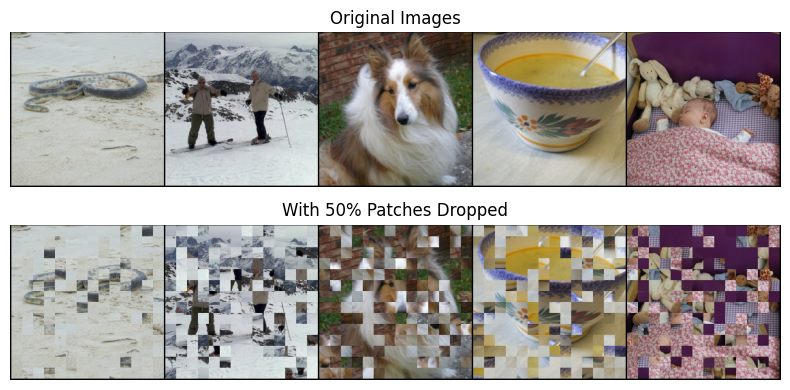

In [ ]:
# Show grid of examples
images, labels = next(iter(val_loader))
images = images.to(DEVICE)

create_permutated_grid(images, per_ratio=0.5)

In [ ]:
def evaluate_with_patch_permutation(model, val_loader, device, per_ratios=[0.0, 0.2, 0.4, 0.6, 0.8]):
    """
    Evaluate model accuracy with different patch drop ratios
    """
    model.eval()
    results = {}
    
    for per_ratio in tqdm(per_ratios):
        correct = 0
        total = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                
                # Apply patch drop
                images = random_patch_permutation(images, permute_ratio=per_ratio)
                
                outputs = model(images)

                if isinstance(outputs, (list, tuple)):
                    outputs = outputs[0] 
                
                _, predicted = outputs.max(1)
                
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
        
        accuracy = 100 * correct / total
        results[per_ratio] = accuracy
        print(f"Permutated ratio: {per_ratio:.2f}, Accuracy: {accuracy:.2f}%")
        
    return results

# Model

## Vision Transformer

In [ ]:
import torchvision.models as models
import timm

# Prepare Model
# def Read_ViT_Model(Model_name):
#     config = CONFIGS[Model_name]
#     model = VisionTransformer(config, num_classes=1000, zero_head=False, img_size=224, vis=True)
#     model.load_from(np.load("/kaggle/input/vit-models/" + Model_name + ".npz"))
#     model.to(DEVICE)
#     model.eval()
#     return model

# ViT_B_16 = Read_ViT_Model("ViT-B_16")
# ViT_B_32 = Read_ViT_Model("ViT-B_32")
# ViT_L_16 = Read_ViT_Model("ViT-L_16")
# ViT_L_32 = Read_ViT_Model("ViT-L_32")

# Load a pretrained Vision Transformer
ViT_B_16 = models.vit_b_16(pretrained=True).to(DEVICE)
ViT_B_32 = models.vit_b_32(pretrained=True).to(DEVICE)
ViT_H_14 = timm.create_model('vit_huge_patch14_224', pretrained=True).to(DEVICE)
ViT_L_16 = models.vit_l_16(pretrained=True).to(DEVICE)
ViT_L_32 = models.vit_l_32(pretrained=True).to(DEVICE)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:04<00:00, 76.4MB/s] 
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed i

model.safetensors:   0%|          | 0.00/2.52G [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_L_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_L_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_l_16-852ce7e3.pth" to /root/.cache/torch/hub/checkpoints/vit_l_16-852ce7e3.pth
100%|██████████| 1.13G/1.13G [00:06<00:00, 196MB/s] 
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_L_32_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_L_32_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Download

In [ ]:
per_ratios = np.arange(0, 1.2, 0.2)

In [ ]:
ResNeT_history_R = evaluate_with_patch_permutation(resnet, val_loader, DEVICE, per_ratios)
ViT_B_16_history_R = evaluate_with_patch_permutation(ViT_B_16, val_loader, DEVICE, per_ratios)
ViT_B_32_history_R = evaluate_with_patch_permutation(ViT_B_32, val_loader, DEVICE, per_ratios)
ViT_L_16_history_R = evaluate_with_patch_permutation(ViT_L_16, val_loader, DEVICE, per_ratios)
ViT_L_32_history_R = evaluate_with_patch_permutation(ViT_L_32, val_loader, DEVICE, per_ratios)

  0%|          | 0/6 [00:00<?, ?it/s]

Permutated ratio: 0.00, Accuracy: 1.05%
Permutated ratio: 0.20, Accuracy: 1.18%
Permutated ratio: 0.40, Accuracy: 2.30%
Permutated ratio: 0.60, Accuracy: 9.92%
Permutated ratio: 0.80, Accuracy: 42.74%
Permutated ratio: 1.00, Accuracy: 76.15%


  0%|          | 0/6 [00:00<?, ?it/s]

Permutated ratio: 0.00, Accuracy: 37.05%
Permutated ratio: 0.20, Accuracy: 42.89%
Permutated ratio: 0.40, Accuracy: 56.86%
Permutated ratio: 0.60, Accuracy: 69.64%
Permutated ratio: 0.80, Accuracy: 77.19%
Permutated ratio: 1.00, Accuracy: 81.07%


  0%|          | 0/6 [00:00<?, ?it/s]

Permutated ratio: 0.00, Accuracy: 1.50%
Permutated ratio: 0.20, Accuracy: 2.25%
Permutated ratio: 0.40, Accuracy: 7.62%
Permutated ratio: 0.60, Accuracy: 30.48%
Permutated ratio: 0.80, Accuracy: 61.37%
Permutated ratio: 1.00, Accuracy: 75.91%


  0%|          | 0/6 [00:00<?, ?it/s]

Permutated ratio: 0.00, Accuracy: 72.57%
Permutated ratio: 0.20, Accuracy: 74.05%
Permutated ratio: 0.40, Accuracy: 76.03%
Permutated ratio: 0.60, Accuracy: 77.72%
Permutated ratio: 0.80, Accuracy: 78.91%
Permutated ratio: 1.00, Accuracy: 79.68%


  0%|          | 0/6 [00:00<?, ?it/s]

Permutated ratio: 0.00, Accuracy: 2.26%
Permutated ratio: 0.20, Accuracy: 3.33%
Permutated ratio: 0.40, Accuracy: 10.75%
Permutated ratio: 0.60, Accuracy: 36.22%
Permutated ratio: 0.80, Accuracy: 64.40%
Permutated ratio: 1.00, Accuracy: 76.96%


## CMT

In [ ]:
## Author: Jianyuan Guo (jyguo@pku.edu.cn)

import math
import logging
from functools import partial
from collections import OrderedDict

import torch
import torch.nn as nn
import torch.nn.functional as F

from timm.data import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
from timm.models.helpers import load_pretrained
from timm.models.layers import DropPath, to_2tuple, trunc_normal_
from timm.models.resnet import resnet26d, resnet50d
from timm.models.registry import register_model

_logger = logging.getLogger(__name__)


def _cfg(url='', **kwargs):
    return {
        'url': url,
        'num_classes': 1000, 'input_size': (3, 224, 224), 'pool_size': None,
        'crop_pct': .9, 'interpolation': 'bicubic',
        'mean': IMAGENET_DEFAULT_MEAN, 'std': IMAGENET_DEFAULT_STD,
        'first_conv': 'patch_embed.proj', 'classifier': 'head',
        **kwargs
    }


# A memory-efficient implementation of Swish function
class SwishImplementation(torch.autograd.Function):
    @staticmethod
    def forward(ctx, i):
        result = i * torch.sigmoid(i)
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        i = ctx.saved_tensors[0]
        sigmoid_i = torch.sigmoid(i)
        return grad_output * (sigmoid_i * (1 + i * (1 - sigmoid_i)))


class MemoryEfficientSwish(nn.Module):
    def forward(self, x):
        return SwishImplementation.apply(x)


class Mlp(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_features, hidden_features, 1, 1, 0, bias=True),
            nn.GELU(),
            nn.BatchNorm2d(hidden_features, eps=1e-5),
        )
        self.proj = nn.Conv2d(hidden_features, hidden_features, 3, 1, 1, groups=hidden_features)
        self.proj_act = nn.GELU()
        self.proj_bn = nn.BatchNorm2d(hidden_features, eps=1e-5)
        self.conv2 = nn.Sequential(
            nn.Conv2d(hidden_features, out_features, 1, 1, 0, bias=True),
            nn.BatchNorm2d(out_features, eps=1e-5),
        )
        self.drop = nn.Dropout(drop)

    def forward(self, x, H, W):
        B, N, C = x.shape
        x = x.permute(0, 2, 1).reshape(B, C, H, W)
        x = self.conv1(x)
        x = self.drop(x)
        x = self.proj(x) + x
        x = self.proj_act(x)
        x = self.proj_bn(x)
        x = self.conv2(x)
        x = x.flatten(2).permute(0, 2, 1)
        x = self.drop(x)
        return x


class Attention(nn.Module):
    def __init__(self, dim, num_heads=8, qkv_bias=False, qk_scale=None, 
                 attn_drop=0., proj_drop=0., qk_ratio=1, sr_ratio=1):
        super().__init__()
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = qk_scale or head_dim ** -0.5
        self.qk_dim = dim // qk_ratio

        self.q = nn.Linear(dim, self.qk_dim, bias=qkv_bias)
        self.k = nn.Linear(dim, self.qk_dim, bias=qkv_bias)
        self.v = nn.Linear(dim, dim, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)
        
        self.sr_ratio = sr_ratio
        # Exactly same as PVTv1
        if self.sr_ratio > 1:
            self.sr = nn.Sequential(
                nn.Conv2d(dim, dim, kernel_size=sr_ratio, stride=sr_ratio, groups=dim, bias=True),
                nn.BatchNorm2d(dim, eps=1e-5),
            )

    def forward(self, x, H, W, relative_pos):
        B, N, C = x.shape
        q = self.q(x).reshape(B, N, self.num_heads, self.qk_dim // self.num_heads).permute(0, 2, 1, 3)
        
        if self.sr_ratio > 1:
            x_ = x.permute(0, 2, 1).reshape(B, C, H, W)
            x_ = self.sr(x_).reshape(B, C, -1).permute(0, 2, 1)
            k = self.k(x_).reshape(B, -1, self.num_heads, self.qk_dim // self.num_heads).permute(0, 2, 1, 3)
            v = self.v(x_).reshape(B, -1, self.num_heads, C // self.num_heads).permute(0, 2, 1, 3)
        else:
            k = self.k(x).reshape(B, N, self.num_heads, self.qk_dim // self.num_heads).permute(0, 2, 1, 3)
            v = self.v(x).reshape(B, N, self.num_heads, C // self.num_heads).permute(0, 2, 1, 3)

        attn = (q @ k.transpose(-2, -1)) * self.scale + relative_pos
        attn = attn.softmax(dim=-1)
        attn = self.attn_drop(attn)
        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x


class Block(nn.Module):
    def __init__(self, dim, num_heads, mlp_ratio=4., qkv_bias=False, qk_scale=None, drop=0., attn_drop=0.,
                 drop_path=0., act_layer=nn.GELU, norm_layer=nn.LayerNorm, qk_ratio=1, sr_ratio=1):
        super().__init__()
        self.norm1 = norm_layer(dim)
        self.attn = Attention(
            dim, num_heads=num_heads, qkv_bias=qkv_bias, qk_scale=qk_scale, 
            attn_drop=attn_drop, proj_drop=drop, qk_ratio=qk_ratio, sr_ratio=sr_ratio)
        # NOTE: drop path for stochastic depth, we shall see if this is better than dropout here
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)
        self.proj = nn.Conv2d(dim, dim, 3, 1, 1, groups=dim)
        
    def forward(self, x, H, W, relative_pos):
        B, N, C = x.shape
        cnn_feat = x.permute(0, 2, 1).reshape(B, C, H, W)
        x = self.proj(cnn_feat) + cnn_feat
        x = x.flatten(2).permute(0, 2, 1)
        x = x + self.drop_path(self.attn(self.norm1(x), H, W, relative_pos))
        x = x + self.drop_path(self.mlp(self.norm2(x), H, W))
        return x


class PatchEmbed(nn.Module):
    """ Image to Patch Embedding
    """
    def __init__(self, img_size=224, patch_size=16, in_chans=3, embed_dim=768):
        super().__init__()
        img_size = to_2tuple(img_size)
        patch_size = to_2tuple(patch_size)
        num_patches = (img_size[1] // patch_size[1]) * (img_size[0] // patch_size[0])
        
        assert img_size[0] % patch_size[0] == 0 and img_size[1] % patch_size[1] == 0, \
            f"img_size {img_size} should be divided by patch_size {patch_size}."
        
        self.img_size = img_size
        self.patch_size = patch_size
        self.num_patches = num_patches

        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.norm = nn.LayerNorm(embed_dim)

    def forward(self, x):
        B, C, H, W = x.shape
        # FIXME look at relaxing size constraints
        assert H == self.img_size[0] and W == self.img_size[1], \
            f"Input image size ({H}*{W}) doesn't match model ({self.img_size[0]}*{self.img_size[1]})."
        x = self.proj(x).flatten(2).transpose(1, 2)
        x = self.norm(x)
        
        H, W = H // self.patch_size[0], W // self.patch_size[1]
        return x, (H, W)


class CMT(nn.Module):
    def __init__(self, img_size=224, in_chans=3, num_classes=1000, embed_dims=[46,92,184,368], stem_channel=16, fc_dim=1280,
                 num_heads=[1,2,4,8], mlp_ratios=[3.6,3.6,3.6,3.6], qkv_bias=True, qk_scale=None, representation_size=None,
                 drop_rate=0., attn_drop_rate=0., drop_path_rate=0., hybrid_backbone=None, norm_layer=None,
                 depths=[2,2,10,2], qk_ratio=1, sr_ratios=[8,4,2,1], dp=0.1):
        super().__init__()
        self.num_classes = num_classes
        self.num_features = self.embed_dim = embed_dims[-1]
        norm_layer = norm_layer or partial(nn.LayerNorm, eps=1e-6)
        
        self.stem_conv1 = nn.Conv2d(3, stem_channel, kernel_size=3, stride=2, padding=1, bias=True)
        self.stem_relu1 = nn.GELU()
        self.stem_norm1 = nn.BatchNorm2d(stem_channel, eps=1e-5)
        
        self.stem_conv2 = nn.Conv2d(stem_channel, stem_channel, kernel_size=3, stride=1, padding=1, bias=True)
        self.stem_relu2 = nn.GELU()
        self.stem_norm2 = nn.BatchNorm2d(stem_channel, eps=1e-5)
        
        self.stem_conv3 = nn.Conv2d(stem_channel, stem_channel, kernel_size=3, stride=1, padding=1, bias=True)
        self.stem_relu3 = nn.GELU()
        self.stem_norm3 = nn.BatchNorm2d(stem_channel, eps=1e-5)

        self.patch_embed_a = PatchEmbed(
            img_size=img_size//2, patch_size=2, in_chans=stem_channel, embed_dim=embed_dims[0])
        self.patch_embed_b = PatchEmbed(
            img_size=img_size//4, patch_size=2, in_chans=embed_dims[0], embed_dim=embed_dims[1])
        self.patch_embed_c = PatchEmbed(
            img_size=img_size//8, patch_size=2, in_chans=embed_dims[1], embed_dim=embed_dims[2])
        self.patch_embed_d = PatchEmbed(
            img_size=img_size//16, patch_size=2, in_chans=embed_dims[2], embed_dim=embed_dims[3])

        self.relative_pos_a = nn.Parameter(torch.randn(
            num_heads[0], self.patch_embed_a.num_patches, self.patch_embed_a.num_patches//sr_ratios[0]//sr_ratios[0]))
        self.relative_pos_b = nn.Parameter(torch.randn(
            num_heads[1], self.patch_embed_b.num_patches, self.patch_embed_b.num_patches//sr_ratios[1]//sr_ratios[1]))
        self.relative_pos_c = nn.Parameter(torch.randn(
            num_heads[2], self.patch_embed_c.num_patches, self.patch_embed_c.num_patches//sr_ratios[2]//sr_ratios[2]))
        self.relative_pos_d = nn.Parameter(torch.randn(
            num_heads[3], self.patch_embed_d.num_patches, self.patch_embed_d.num_patches//sr_ratios[3]//sr_ratios[3]))
        
        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]  # stochastic depth decay rule
        cur = 0
        self.blocks_a = nn.ModuleList([
            Block(
                dim=embed_dims[0], num_heads=num_heads[0], mlp_ratio=mlp_ratios[0], qkv_bias=qkv_bias,
                qk_scale=qk_scale, drop=drop_rate, attn_drop=attn_drop_rate, drop_path=dpr[cur+i],
                norm_layer=norm_layer, qk_ratio=qk_ratio, sr_ratio=sr_ratios[0])
            for i in range(depths[0])])
        cur += depths[0]
        self.blocks_b = nn.ModuleList([
            Block(
                dim=embed_dims[1], num_heads=num_heads[1], mlp_ratio=mlp_ratios[1], qkv_bias=qkv_bias,
                qk_scale=qk_scale, drop=drop_rate, attn_drop=attn_drop_rate, drop_path=dpr[cur+i],
                norm_layer=norm_layer, qk_ratio=qk_ratio, sr_ratio=sr_ratios[1])
            for i in range(depths[1])])
        cur += depths[1]
        self.blocks_c = nn.ModuleList([
            Block(
                dim=embed_dims[2], num_heads=num_heads[2], mlp_ratio=mlp_ratios[2], qkv_bias=qkv_bias,
                qk_scale=qk_scale, drop=drop_rate, attn_drop=attn_drop_rate, drop_path=dpr[cur+i],
                norm_layer=norm_layer, qk_ratio=qk_ratio, sr_ratio=sr_ratios[2])
            for i in range(depths[2])])
        cur += depths[2]
        self.blocks_d = nn.ModuleList([
            Block(
                dim=embed_dims[3], num_heads=num_heads[3], mlp_ratio=mlp_ratios[3], qkv_bias=qkv_bias,
                qk_scale=qk_scale, drop=drop_rate, attn_drop=attn_drop_rate, drop_path=dpr[cur+i],
                norm_layer=norm_layer, qk_ratio=qk_ratio, sr_ratio=sr_ratios[3])
            for i in range(depths[3])])

        # Representation layer
        if representation_size:
            self.num_features = representation_size
            self.pre_logits = nn.Sequential(OrderedDict([
                ('fc', nn.Linear(embed_dim, representation_size)),
                ('act', nn.Tanh())
            ]))
        else:
            self.pre_logits = nn.Identity()

        # Classifier head
        self._fc = nn.Conv2d(embed_dims[-1], fc_dim, kernel_size=1)
        self._bn = nn.BatchNorm2d(fc_dim, eps=1e-5)
        self._swish = MemoryEfficientSwish()
        self._avg_pooling = nn.AdaptiveAvgPool2d(1)
        self._drop = nn.Dropout(dp)
        self.head = nn.Linear(fc_dim, num_classes) if num_classes > 0 else nn.Identity()
        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            trunc_normal_(m.weight, std=.02)
            if isinstance(m, nn.Linear) and m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.Conv2d):
            nn.init.kaiming_normal_(m.weight, mode='fan_out')
            if isinstance(m, nn.Conv2d) and m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)
        elif isinstance(m, nn.BatchNorm2d):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)
            
    def update_temperature(self):
        for m in self.modules():
            if isinstance(m, Attention):
                m.update_temperature()

    @torch.jit.ignore
    def no_weight_decay(self):
        return {'pos_embed', 'cls_token'}

    def get_classifier(self):
        return self.head

    def reset_classifier(self, num_classes, global_pool=''):
        self.num_classes = num_classes
        self.head = nn.Linear(self.embed_dims[-1], num_classes) if num_classes > 0 else nn.Identity()

    def forward_features(self, x):
        B = x.shape[0]
        x = self.stem_conv1(x)
        x = self.stem_relu1(x)
        x = self.stem_norm1(x)
        
        x = self.stem_conv2(x)
        x = self.stem_relu2(x)
        x = self.stem_norm2(x)
        
        x = self.stem_conv3(x)
        x = self.stem_relu3(x)
        x = self.stem_norm3(x)
        
        x, (H, W) = self.patch_embed_a(x)
        for i, blk in enumerate(self.blocks_a):
            x = blk(x, H, W, self.relative_pos_a)
            
        x = x.reshape(B, H, W, -1).permute(0, 3, 1, 2).contiguous()
        x, (H, W) = self.patch_embed_b(x)
        for i, blk in enumerate(self.blocks_b):
            x = blk(x, H, W, self.relative_pos_b)
            
        x = x.reshape(B, H, W, -1).permute(0, 3, 1, 2).contiguous()
        x, (H, W) = self.patch_embed_c(x)
        for i, blk in enumerate(self.blocks_c):
            x = blk(x, H, W, self.relative_pos_c)
            
        x = x.reshape(B, H, W, -1).permute(0, 3, 1, 2).contiguous()
        x, (H, W) = self.patch_embed_d(x)
        for i, blk in enumerate(self.blocks_d):
            x = blk(x, H, W, self.relative_pos_d)

        B, N, C = x.shape
        x = self._fc(x.permute(0, 2, 1).reshape(B, C, H, W))
        x = self._bn(x)
        x = self._swish(x)
        x = self._avg_pooling(x).flatten(start_dim=1)
        x = self._drop(x)
        x = self.pre_logits(x)
        return x

    def forward(self, x):
        x = self.forward_features(x)
        x = self.head(x)
        return x


def resize_pos_embed(posemb, posemb_new):
    # Rescale the grid of position embeddings when loading from state_dict. Adapted from
    # https://github.com/google-research/vision_transformer/blob/00883dd691c63a6830751563748663526e811cee/vit_jax/checkpoint.py#L224
    _logger.info('Resized position embedding: %s to %s', posemb.shape, posemb_new.shape)
    ntok_new = posemb_new.shape[1]
    if True:
        posemb_tok, posemb_grid = posemb[:, :1], posemb[0, 1:]
        ntok_new -= 1
    else:
        posemb_tok, posemb_grid = posemb[:, :0], posemb[0]
    gs_old = int(math.sqrt(len(posemb_grid)))
    gs_new = int(math.sqrt(ntok_new))
    _logger.info('Position embedding grid-size from %s to %s', gs_old, gs_new)
    posemb_grid = posemb_grid.reshape(1, gs_old, gs_old, -1).permute(0, 3, 1, 2)
    posemb_grid = F.interpolate(posemb_grid, size=(gs_new, gs_new), mode='bilinear')
    posemb_grid = posemb_grid.permute(0, 2, 3, 1).reshape(1, gs_new * gs_new, -1)
    posemb = torch.cat([posemb_tok, posemb_grid], dim=1)
    return posemb


def checkpoint_filter_fn(state_dict, model):
    """ convert patch embedding weight from manual patchify + linear proj to conv"""
    out_dict = {}
    if 'model' in state_dict:
        # For deit models
        state_dict = state_dict['model']
    for k, v in state_dict.items():
        if 'patch_embed.proj.weight' in k and len(v.shape) < 4:
            # For old models that I trained prior to conv based patchification
            O, I, H, W = model.patch_embed.proj.weight.shape
            v = v.reshape(O, -1, H, W)
        elif k == 'pos_embed' and v.shape != model.pos_embed.shape:
            # To resize pos embedding when using model at different size from pretrained weights
            v = resize_pos_embed(v, model.pos_embed)
        out_dict[k] = v
    return out_dict


def _create_cmt_model(pretrained=False, distilled=False, **kwargs):
    default_cfg = _cfg()
    default_num_classes = default_cfg['num_classes']
    default_img_size = default_cfg['input_size'][-1]

    num_classes = kwargs.pop('num_classes', default_num_classes)
    img_size = kwargs.pop('img_size', default_img_size)
    repr_size = kwargs.pop('representation_size', None)
    if repr_size is not None and num_classes != default_num_classes:
        # Remove representation layer if fine-tuning. This may not always be the desired action,
        # but I feel better than doing nothing by default for fine-tuning. Perhaps a better interface?
        _logger.warning("Removing representation layer for fine-tuning.")
        repr_size = None

    model = CMT(img_size=img_size, num_classes=num_classes, representation_size=repr_size, **kwargs)
    model.default_cfg = default_cfg

    if pretrained:
        load_pretrained(
            model, num_classes=num_classes, in_chans=kwargs.get('in_chans', 3),
            filter_fn=partial(checkpoint_filter_fn, model=model))
    return model


@register_model
def cmt_ti(pretrained=False, **kwargs):
    """ 
    CMT-Tiny
    """
    model_kwargs = dict(qkv_bias=True, **kwargs)
    model = _create_cmt_model(pretrained=pretrained, **model_kwargs)
    return model

@register_model
def cmt_xs(pretrained=False, **kwargs):
    """ 
    CMT-XS: dim x 0.9, depth x 0.8, input 192
    """
    model_kwargs = dict(
        qkv_bias=True, embed_dims=[52,104,208,416], stem_channel=16, num_heads=[1,2,4,8],
        depths=[3,3,12,3], mlp_ratios=[3.77,3.77,3.77,3.77], qk_ratio=1, sr_ratios=[8,4,2,1], **kwargs)
    model = _create_cmt_model(pretrained=pretrained, **model_kwargs)
    return model

@register_model
def cmt_s(pretrained=False, **kwargs):
    """ 
    CMT-Small
    """
    model_kwargs = dict(
        qkv_bias=True, embed_dims=[64,128,256,512], stem_channel=32, num_heads=[1,2,4,8],
        depths=[3,3,16,3], mlp_ratios=[4,4,4,4], qk_ratio=1, sr_ratios=[8,4,2,1], **kwargs)
    model = _create_cmt_model(pretrained=pretrained, **model_kwargs)
    return model

@register_model
def cmt_b(pretrained=False, **kwargs):
    """ 
    CMT-Base
    """
    model_kwargs = dict(
        qkv_bias=True, embed_dims=[76,152,304,608], stem_channel=38, num_heads=[1,2,4,8],
        depths=[4,4,20,4], mlp_ratios=[4,4,4,4], qk_ratio=1, sr_ratios=[8,4,2,1], dp=0.3, **kwargs)
    model = _create_cmt_model(pretrained=pretrained, **model_kwargs)
    return model

In [ ]:
state_dict = torch.load("/kaggle/input/cmt-base-pth/cmt_base.pth", map_location="cpu", weights_only=True)

if "model" in state_dict:
    state_dict = state_dict["model"]

CMTmodel = cmt_b(pretrained=False, num_classes=1000, img_size=256).to(DEVICE)
CMTmodel.load_state_dict(state_dict) 

<All keys matched successfully>

In [ ]:
per_ratios = np.arange(0, 1.2, 0.2)

 17%|█▋        | 1/6 [06:41<33:25, 401.20s/it]

Permutated ratio: 0.00, Accuracy: 7.63%


 33%|███▎      | 2/6 [13:31<27:06, 406.52s/it]

Permutated ratio: 0.20, Accuracy: 13.03%


 50%|█████     | 3/6 [20:27<20:33, 411.03s/it]

Permutated ratio: 0.40, Accuracy: 35.56%


 67%|██████▋   | 4/6 [27:28<13:50, 415.02s/it]

Permutated ratio: 0.60, Accuracy: 63.13%


 83%|████████▎ | 5/6 [34:33<06:58, 418.30s/it]

Permutated ratio: 0.80, Accuracy: 78.91%


100%|██████████| 6/6 [41:37<00:00, 416.19s/it]

Permutated ratio: 1.00, Accuracy: 84.54%


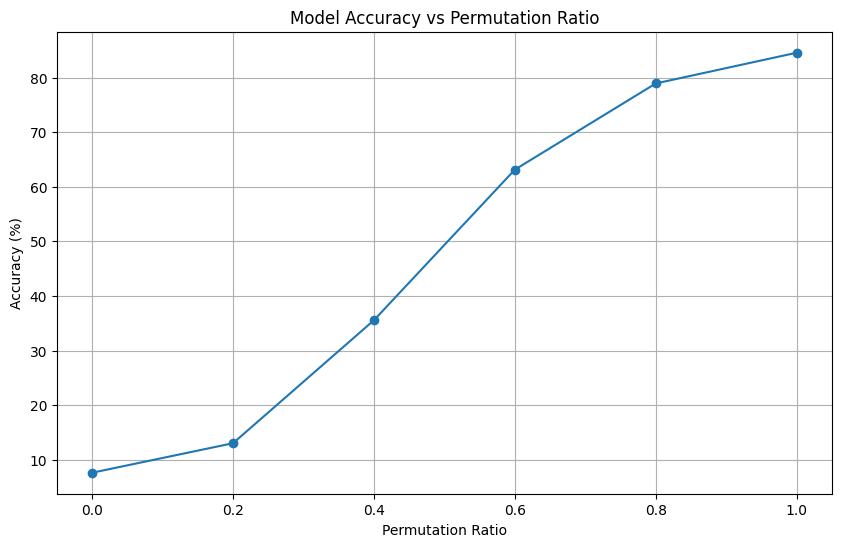

In [ ]:
CMTmodel_R = evaluate_with_patch_permutation(CMTmodel, val_loader, DEVICE, per_ratios)